In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('housepricedata.csv')

In [3]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [4]:
dataset = df.values

In [5]:
dataset   #To convert our dataframe into an array, we just store the values of df (by accessing df.values) into the variable ‘dataset’.

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [6]:
X = dataset[:,0:10]  # what happened here?

In [7]:
Y = dataset[:,10]  #We then assign the last column of our array to Y

In [8]:
Y

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [9]:
from sklearn import preprocessing

In [10]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [11]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [14]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5) 
# we want a separate validation set and test set, we can use the same function to do the split again on val_and_test:

In [15]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [16]:
from keras.models import Sequential
from keras.layers import Dense

In [18]:
model = Sequential([
    Dense(6, activation='relu', input_shape=(10,)),  #(10+1)/2

    Dense(1, activation='sigmoid'),
])

In [19]:
model.compile(optimizer='adam',  #sgd’ refers to stochastic gradient descent (over here, it refers to mini-batch gradient descent),
              loss='binary_crossentropy', #The loss function for outputs that take the values 1 or 0 is called binary cross entropy.
              metrics=['accuracy'])  #we want to track accuracy on top of the loss function.

In [20]:
result = model.fit(X_train, Y_train,
          batch_size=16, epochs=100, # these parameters can significantly change your accuracy.
          validation_data=(X_val, Y_val))



Epoch 1/100
64/64 [==============================] - 1s 5ms/step - loss: 0.7262 - accuracy: 0.4687 - val_loss: 0.7063 - val_accuracy: 0.4658
Epoch 2/100
64/64 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.4951 - val_loss: 0.6812 - val_accuracy: 0.5616
Epoch 3/100
64/64 [==============================] - 0s 2ms/step - loss: 0.6795 - accuracy: 0.5988 - val_loss: 0.6663 - val_accuracy: 0.6119
Epoch 4/100
64/64 [==============================] - 0s 2ms/step - loss: 0.6631 - accuracy: 0.6585 - val_loss: 0.6416 - val_accuracy: 0.7260
Epoch 5/100
64/64 [==============================] - 0s 3ms/step - loss: 0.6413 - accuracy: 0.7114 - val_loss: 0.6196 - val_accuracy: 0.7854
Epoch 6/100
64/64 [==============================] - 0s 2ms/step - loss: 0.6216 - accuracy: 0.7495 - val_loss: 0.5977 - val_accuracy: 0.7945
Epoch 7/100
64/64 [==============================] - 0s 2ms/step - loss: 0.6017 - accuracy: 0.7710 - val_loss: 0.5751 - val_accuracy: 0.8082
Epoch 8/100
6

Epoch 59/100
64/64 [==============================] - 0s 2ms/step - loss: 0.2880 - accuracy: 0.8845 - val_loss: 0.2481 - val_accuracy: 0.8995
Epoch 60/100
64/64 [==============================] - 0s 2ms/step - loss: 0.2863 - accuracy: 0.8865 - val_loss: 0.2472 - val_accuracy: 0.8995
Epoch 61/100
64/64 [==============================] - 0s 2ms/step - loss: 0.2864 - accuracy: 0.8836 - val_loss: 0.2462 - val_accuracy: 0.8995
Epoch 62/100
64/64 [==============================] - 0s 2ms/step - loss: 0.2842 - accuracy: 0.8865 - val_loss: 0.2452 - val_accuracy: 0.8995
Epoch 63/100
64/64 [==============================] - 0s 2ms/step - loss: 0.2834 - accuracy: 0.8885 - val_loss: 0.2460 - val_accuracy: 0.8950
Epoch 64/100
64/64 [==============================] - 0s 2ms/step - loss: 0.2829 - accuracy: 0.8865 - val_loss: 0.2432 - val_accuracy: 0.9041
Epoch 65/100
64/64 [==============================] - 0s 2ms/step - loss: 0.2817 - accuracy: 0.8855 - val_loss: 0.2423 - val_accuracy: 0.8995
Epoch 

# Visualization

In [21]:
import matplotlib.pyplot as plt

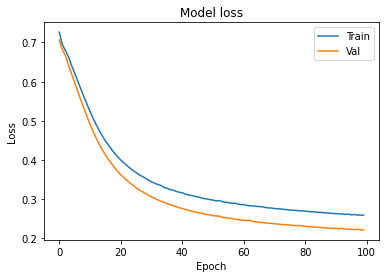

In [22]:
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

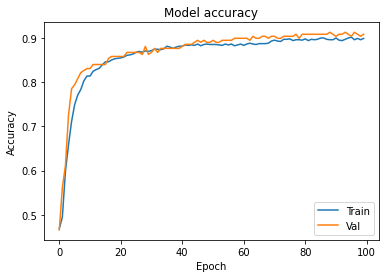

In [23]:
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

## CHAPTER 2 ADDING REGULARIZATION AND DEALING WITH OVERFITTING

In [25]:
model_2 = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
   
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=16, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
64/64 [==============================] - 1s 4ms/step - loss: 0.6542 - accuracy: 0.7387 - val_loss: 0.5748 - val_accuracy: 0.8174
Epoch 2/100
64/64 [==============================] - 0s 3ms/step - loss: 0.4826 - accuracy: 0.8513 - val_loss: 0.3511 - val_accuracy: 0.8539
Epoch 3/100
64/64 [==============================] - 0s 2ms/step - loss: 0.3615 - accuracy: 0.8601 - val_loss: 0.2980 - val_accuracy: 0.8676
Epoch 4/100
64/64 [==============================] - 0s 3ms/step - loss: 0.3374 - accuracy: 0.8630 - val_loss: 0.2835 - val_accuracy: 0.8721
Epoch 5/100
64/64 [==============================] - 0s 2ms/step - loss: 0.3219 - accuracy: 0.8708 - val_loss: 0.2711 - val_accuracy: 0.8858
Epoch 6/100
64/64 [==============================] - 0s 3ms/step - loss: 0.3118 - accuracy: 0.8796 - val_loss: 0.2635 - val_accuracy: 0.8813
Epoch 7/100
64/64 [==============================] - 0s 2ms/step - loss: 0.3061 - accuracy: 0.8748 - val_loss: 0.2589 - val_accuracy: 0.8813
Epoch 8/100
6

Epoch 59/100
64/64 [==============================] - 0s 2ms/step - loss: 0.1937 - accuracy: 0.9217 - val_loss: 0.2011 - val_accuracy: 0.9087
Epoch 60/100
64/64 [==============================] - 0s 2ms/step - loss: 0.2033 - accuracy: 0.9139 - val_loss: 0.2395 - val_accuracy: 0.8995
Epoch 61/100
64/64 [==============================] - 0s 2ms/step - loss: 0.1834 - accuracy: 0.9227 - val_loss: 0.2121 - val_accuracy: 0.9087
Epoch 62/100
64/64 [==============================] - 0s 2ms/step - loss: 0.1894 - accuracy: 0.9178 - val_loss: 0.2048 - val_accuracy: 0.9041
Epoch 63/100
64/64 [==============================] - 0s 2ms/step - loss: 0.1964 - accuracy: 0.9061 - val_loss: 0.2050 - val_accuracy: 0.9041
Epoch 64/100
64/64 [==============================] - 0s 2ms/step - loss: 0.1931 - accuracy: 0.9217 - val_loss: 0.2101 - val_accuracy: 0.8950
Epoch 65/100
64/64 [==============================] - 0s 2ms/step - loss: 0.1913 - accuracy: 0.9159 - val_loss: 0.1993 - val_accuracy: 0.9041
Epoch 

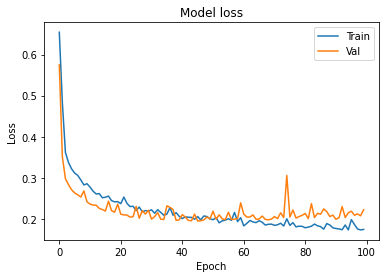

In [26]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

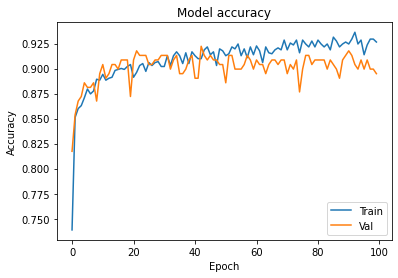

In [27]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

 L2 regularization and dropout: why?
 This is a clear sign of over-fitting. The training loss is decreasing, but the validation loss is way above the training loss and increasing. high variance means you might be having overfitting scenario.

In [55]:
from keras.layers import Dropout
from keras import regularizers

In [56]:
model_3 = Sequential([
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.005), input_shape=(10,)), # lambda sign
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.005)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.005)),
    Dropout(0.3),
    
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.005)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.005)),
])

In [57]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=16, epochs=200,
          validation_data=(X_val, Y_val))

Epoch 1/200
64/64 [==============================] - 1s 6ms/step - loss: 1.1683 - accuracy: 0.4687 - val_loss: 1.0591 - val_accuracy: 0.6712
Epoch 2/200
64/64 [==============================] - 0s 3ms/step - loss: 0.9965 - accuracy: 0.5646 - val_loss: 0.9154 - val_accuracy: 0.7945
Epoch 3/200
64/64 [==============================] - 0s 2ms/step - loss: 0.8695 - accuracy: 0.6663 - val_loss: 0.7693 - val_accuracy: 0.8174
Epoch 4/200
64/64 [==============================] - 0s 3ms/step - loss: 0.7357 - accuracy: 0.7681 - val_loss: 0.5811 - val_accuracy: 0.8676
Epoch 5/200
64/64 [==============================] - 0s 3ms/step - loss: 0.6105 - accuracy: 0.8092 - val_loss: 0.4963 - val_accuracy: 0.8721
Epoch 6/200
64/64 [==============================] - 0s 3ms/step - loss: 0.5895 - accuracy: 0.8229 - val_loss: 0.4631 - val_accuracy: 0.8767
Epoch 7/200
64/64 [==============================] - 0s 3ms/step - loss: 0.5313 - accuracy: 0.8513 - val_loss: 0.4470 - val_accuracy: 0.8904
Epoch 8/200
6

Epoch 59/200
64/64 [==============================] - 0s 3ms/step - loss: 0.3929 - accuracy: 0.8885 - val_loss: 0.3241 - val_accuracy: 0.9087
Epoch 60/200
64/64 [==============================] - 0s 2ms/step - loss: 0.3734 - accuracy: 0.8914 - val_loss: 0.3239 - val_accuracy: 0.9087
Epoch 61/200
64/64 [==============================] - 0s 2ms/step - loss: 0.3871 - accuracy: 0.8875 - val_loss: 0.3272 - val_accuracy: 0.9087
Epoch 62/200
64/64 [==============================] - 0s 3ms/step - loss: 0.3723 - accuracy: 0.8933 - val_loss: 0.3337 - val_accuracy: 0.9087
Epoch 63/200
64/64 [==============================] - 0s 2ms/step - loss: 0.3839 - accuracy: 0.8875 - val_loss: 0.3233 - val_accuracy: 0.9087
Epoch 64/200
64/64 [==============================] - 0s 2ms/step - loss: 0.3840 - accuracy: 0.8845 - val_loss: 0.3257 - val_accuracy: 0.9087
Epoch 65/200
64/64 [==============================] - 0s 2ms/step - loss: 0.3722 - accuracy: 0.8973 - val_loss: 0.3212 - val_accuracy: 0.9087
Epoch 

64/64 [==============================] - 0s 2ms/step - loss: 0.3799 - accuracy: 0.8904 - val_loss: 0.3315 - val_accuracy: 0.8995
Epoch 117/200
64/64 [==============================] - 0s 2ms/step - loss: 0.3805 - accuracy: 0.8885 - val_loss: 0.3221 - val_accuracy: 0.9087
Epoch 118/200
64/64 [==============================] - 0s 3ms/step - loss: 0.3773 - accuracy: 0.8904 - val_loss: 0.3212 - val_accuracy: 0.9087
Epoch 119/200
64/64 [==============================] - 0s 3ms/step - loss: 0.3729 - accuracy: 0.8875 - val_loss: 0.3170 - val_accuracy: 0.9087
Epoch 120/200
64/64 [==============================] - 0s 2ms/step - loss: 0.3871 - accuracy: 0.8836 - val_loss: 0.3234 - val_accuracy: 0.9041
Epoch 121/200
64/64 [==============================] - 0s 2ms/step - loss: 0.3589 - accuracy: 0.9051 - val_loss: 0.3191 - val_accuracy: 0.9041
Epoch 122/200
64/64 [==============================] - 0s 2ms/step - loss: 0.3788 - accuracy: 0.8875 - val_loss: 0.3225 - val_accuracy: 0.9041
Epoch 123/200

64/64 [==============================] - 0s 2ms/step - loss: 0.3694 - accuracy: 0.8826 - val_loss: 0.3171 - val_accuracy: 0.9041
Epoch 174/200
64/64 [==============================] - 0s 2ms/step - loss: 0.3691 - accuracy: 0.8933 - val_loss: 0.3228 - val_accuracy: 0.9041
Epoch 175/200
64/64 [==============================] - 0s 3ms/step - loss: 0.3660 - accuracy: 0.8904 - val_loss: 0.3154 - val_accuracy: 0.9087
Epoch 176/200
64/64 [==============================] - 0s 2ms/step - loss: 0.3614 - accuracy: 0.8933 - val_loss: 0.3397 - val_accuracy: 0.8858
Epoch 177/200
64/64 [==============================] - 0s 2ms/step - loss: 0.3614 - accuracy: 0.8914 - val_loss: 0.3133 - val_accuracy: 0.9132
Epoch 178/200
64/64 [==============================] - 0s 2ms/step - loss: 0.3805 - accuracy: 0.8953 - val_loss: 0.3239 - val_accuracy: 0.9041
Epoch 179/200
64/64 [==============================] - 0s 2ms/step - loss: 0.3781 - accuracy: 0.8924 - val_loss: 0.3169 - val_accuracy: 0.9132
Epoch 180/200

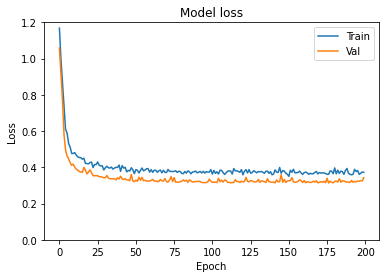

In [58]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

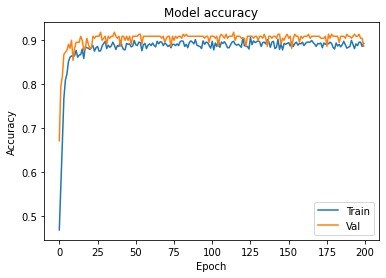

In [59]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

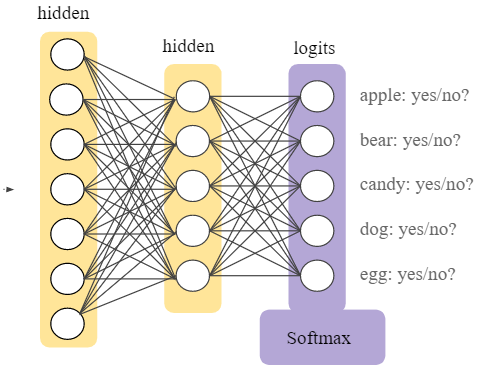

In [60]:
from IPython.display import Image
Image(filename='softmax1.png')

In [53]:
# rectified linear function
def rectified(x):
    return max(0.0, x)

In [54]:
# demonstrate the rectified linear function
 
# rectified linear function
def rectified(x):
    return max(0.0, x)
 
# demonstrate with a positive input
x = 1.0
print('rectified(%.1f) is %.1f' % (x, rectified(x)))
x = 1000.0
print('rectified(%.1f) is %.1f' % (x, rectified(x)))
# demonstrate with a zero input
x = 0.0
print('rectified(%.1f) is %.1f' % (x, rectified(x)))
# demonstrate with a negative input
x = -1.0
print('rectified(%.1f) is %.1f' % (x, rectified(x)))
x = -1000.0
print('rectified(%.1f) is %.1f' % (x, rectified(x)))

rectified(1.0) is 1.0
rectified(1000.0) is 1000.0
rectified(0.0) is 0.0
rectified(-1.0) is 0.0
rectified(-1000.0) is 0.0


In [ ]:
#y = max(0, x)  GENERAL FORMULA OF RELU

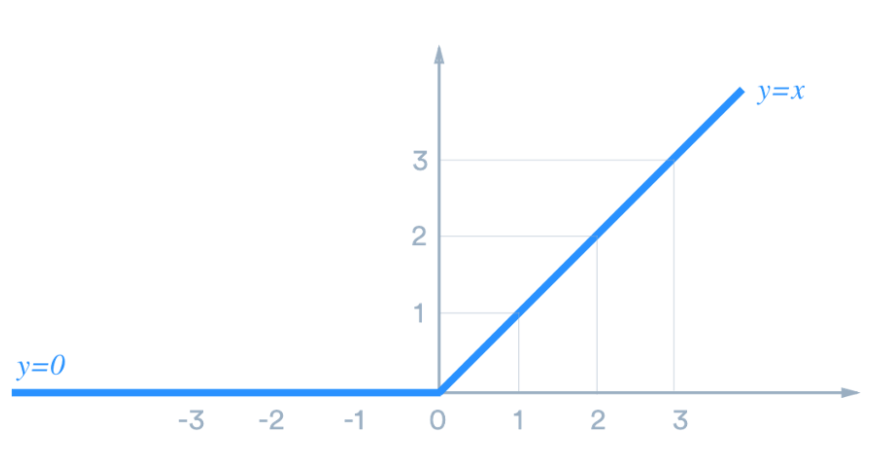

In [24]:
from IPython.display import Image
Image(filename='RELLU1.png')